In [11]:
import pandas as pd
from stockstats import StockDataFrame
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
!pip install stockstats

In [12]:
import pandas as pd

# Read the data
data = pd.read_csv("data/AAPL.csv")
data = data[["Date","Low","Open","Volume","High","Close"]]
# Ensure the data types are correct, especially the 'date' column if it's not in datetime format
data



,Date,Low,Open,Volume,High,Close
0,2017-01-03,28.690001,28.950001,115127600,29.082500,29.037500
1,2017-01-04,28.937500,28.962500,84472400,29.127501,29.004999
2,2017-01-05,28.952499,28.980000,88774400,29.215000,29.152500
3,2017-01-06,29.117500,29.195000,127007600,29.540001,29.477501
4,2017-01-09,29.485001,29.487499,134247600,29.857500,29.747499
...,...,...,...,...,...,...
1773,2024-01-22,192.259995,192.300003,60133900,195.330002,193.889999
1774,2024-01-23,193.830002,195.020004,42355600,195.750000,195.179993
1775,2024-01-24,194.339996,195.419998,53631300,196.380005,194.500000
1776,2024-01-25,193.110001,195.220001,54822100,196.270004,194.169998


In [3]:
data.isnull().values.any()


False

In [4]:
data.isnull().sum()


Date      0
Low       0
Open      0
Volume    0
High      0
Close     0
dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Date'])


In [6]:
data

,Date,Low,Open,Volume,High,Close
0,2017-01-03,28.690001,28.950001,115127600,29.082500,29.037500
1,2017-01-04,28.937500,28.962500,84472400,29.127501,29.004999
2,2017-01-05,28.952499,28.980000,88774400,29.215000,29.152500
3,2017-01-06,29.117500,29.195000,127007600,29.540001,29.477501
4,2017-01-09,29.485001,29.487499,134247600,29.857500,29.747499
...,...,...,...,...,...,...
1773,2024-01-22,192.259995,192.300003,60133900,195.330002,193.889999
1774,2024-01-23,193.830002,195.020004,42355600,195.750000,195.179993
1775,2024-01-24,194.339996,195.419998,53631300,196.380005,194.500000
1776,2024-01-25,193.110001,195.220001,54822100,196.270004,194.169998


In [17]:
import pandas as pd

# Assuming 'df' is your DataFrame and the 'Date' column is already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the DataFrame to include only records after January 1st, 2018
filtered_df = data[data['Date'] > '2017-12-31']
filtered_df

,Date,Low,Open,Volume,High,Close
251,2018-01-02,42.314999,42.540001,102223600,43.075001,43.064999
252,2018-01-03,42.990002,43.132500,118071600,43.637501,43.057499
253,2018-01-04,43.020000,43.134998,89738400,43.367500,43.257500
254,2018-01-05,43.262501,43.360001,94640000,43.842499,43.750000
255,2018-01-08,43.482498,43.587502,82271200,43.902500,43.587502
...,...,...,...,...,...,...
1773,2024-01-22,192.259995,192.300003,60133900,195.330002,193.889999
1774,2024-01-23,193.830002,195.020004,42355600,195.750000,195.179993
1775,2024-01-24,194.339996,195.419998,53631300,196.380005,194.500000
1776,2024-01-25,193.110001,195.220001,54822100,196.270004,194.169998


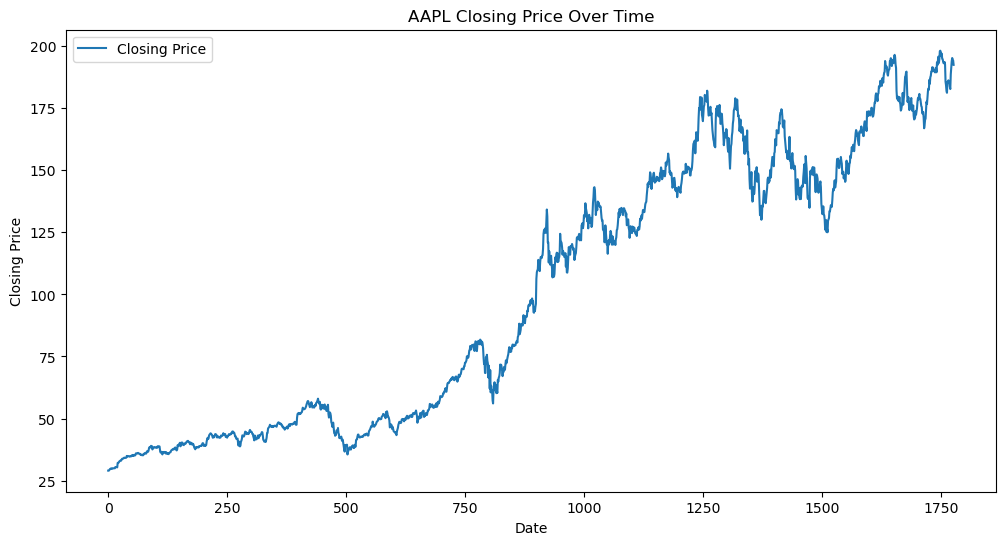

In [14]:
# Set 'Date' as the index of the dataframe for easier plotting
#data.set_index('Date', inplace=True)

# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



In [10]:
data

,Low,Open,Volume,High,Close
Date,,,,,
2017-01-03,28.690001,28.950001,115127600,29.082500,29.037500
2017-01-04,28.937500,28.962500,84472400,29.127501,29.004999
2017-01-05,28.952499,28.980000,88774400,29.215000,29.152500
2017-01-06,29.117500,29.195000,127007600,29.540001,29.477501
2017-01-09,29.485001,29.487499,134247600,29.857500,29.747499
...,...,...,...,...,...
2024-01-22,192.259995,192.300003,60133900,195.330002,193.889999
2024-01-23,193.830002,195.020004,42355600,195.750000,195.179993
2024-01-24,194.339996,195.419998,53631300,196.380005,194.500000


In [3]:
#data['Date'] = pd.to_datetime(data['Date'])

# Calculate the momentum indicators
data['MOM_5'] = data['Close'] - data['Close'].shift(5)   # 5-day Momentum
data['MOM_10'] = data['Close'] - data['Close'].shift(10) # 10-day Momentum
data['MOM_14'] = data['Close'] - data['Close'].shift(14) # 14-day Momentum

# Stochastic Oscillator Calculations
# %K Line = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
# %D Line = 3-day Simple Moving Average of %K
lowest_low = data['Low'].rolling(window=14).min()
highest_high = data['High'].rolling(window=14).max()
data['STCK'] = 100 * ((data['Close'] - lowest_low) / (highest_high - lowest_low))
data['STCD'] = data['STCK'].rolling(window=3).mean()


In [4]:
data.head(30)

,Date,Low,Open,Volume,High,Close,MOM_5,MOM_10,MOM_14,STCK,STCD
0,2017-01-03,28.690001,28.950001,115127600,29.082500,29.037500,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,28.937500,28.962500,84472400,29.127501,29.004999,NaN,NaN,NaN,NaN,NaN
2,2017-01-05,28.952499,28.980000,88774400,29.215000,29.152500,NaN,NaN,NaN,NaN,NaN
3,2017-01-06,29.117500,29.195000,127007600,29.540001,29.477501,NaN,NaN,NaN,NaN,NaN
4,2017-01-09,29.485001,29.487499,134247600,29.857500,29.747499,NaN,NaN,NaN,NaN,NaN
5,2017-01-10,29.575001,29.692499,97848400,29.844999,29.777500,0.740000,NaN,NaN,NaN,NaN
6,2017-01-11,29.650000,29.684999,110354400,29.982500,29.937500,0.932501,NaN,NaN,NaN,NaN
7,2017-01-12,29.552500,29.725000,108344800,29.825001,29.812500,0.660000,NaN,NaN,NaN,NaN
8,2017-01-13,29.702499,29.777500,104447600,29.905001,29.760000,0.282499,NaN,NaN,NaN,NaN
9,2017-01-17,29.555000,29.584999,137759200,30.059999,30.000000,0.252501,NaN,NaN,NaN,NaN


In [5]:
raw_data = pd.read_csv("data/AAPL.csv")
tmp_stock = StockDataFrame.retype(raw_data)
data = data[['Date', 'Close', 'MOM_5', 'MOM_10', 'MOM_14', 'STCK', 'STCD']]

days = [5, 10, 14, 30, 50, 100, 200]
for day in days:
    data['close_'+str(day)+'_sma'] = tmp_stock['close_'+str(day)+'_sma'].values
    data['close_'+str(day)+'_ema'] = tmp_stock['close_'+str(day)+'_ema'].values

tmp_stock.MACD_EMA_LONG = 26
tmp_stock.MACD_EMA_SHORT = 13
tmp_stock.MACD_EMA_SIGNAL = 19
data['macd_26_13_19'] = tmp_stock['macd'].values
tmp_stock.MACD_EMA_LONG = 45
tmp_stock.MACD_EMA_SHORT = 25
tmp_stock.MACD_EMA_SIGNAL = 15
data['macd_45_25_15'] = tmp_stock['macd'].values

for day in [14, 28]:
    data['rsi_'+str(day)] = tmp_stock['rsi_'+str(day)].values

for day in [14, 28, 50, 100]:
    data['wr_'+str(day)] = tmp_stock['wr_'+str(day)].values

for day in [14, 50, 100]:
    data['cci_'+str(day)] = tmp_stock['cci_'+str(day)].values

#data.to_csv('./data/AAPL_process.csv', sep=',', header=True, index=False)

/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_86879/4056503680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_'+str(day)+'_sma'] = tmp_stock['close_'+str(day)+'_sma'].values
/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_86879/4056503680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['close_'+str(day)+'_ema'] = tmp_stock['close_'+str(day)+'_ema'].values
/var/folders/y5/qp48w1ln6rjgp1z1m108n5t80000gn/T/ipykernel_86879/4056503680.py:7: SettingWithCopyWarning

In [6]:
data.head(30)

,Date,Close,MOM_5,MOM_10,MOM_14,STCK,STCD,close_5_sma,close_5_ema,close_10_sma,...,macd_45_25_15,rsi_14,rsi_28,wr_14,wr_28,wr_50,wr_100,cci_14,cci_50,cci_100
0,2017-01-03,29.037500,NaN,NaN,NaN,NaN,NaN,29.037500,29.037500,29.037500,...,0.000000,NaN,NaN,-11.464997,-11.464997,-11.464997,-11.464997,NaN,NaN,NaN
1,2017-01-04,29.004999,NaN,NaN,NaN,NaN,NaN,29.021250,29.017999,29.021250,...,-0.000729,0.000000,0.000000,-28.000457,-28.000457,-28.000457,-28.000457,66.666667,66.666667,66.666667
2,2017-01-05,29.152500,NaN,NaN,NaN,NaN,NaN,29.065000,29.081710,29.065000,...,0.003645,83.014737,82.475939,-11.904785,-11.904785,-11.904785,-11.904785,98.701294,98.701294,98.701294
3,2017-01-06,29.477501,NaN,NaN,NaN,NaN,NaN,29.168125,29.246116,29.168125,...,0.017279,94.280736,93.924887,-7.352941,-7.352941,-7.352941,-7.352941,133.333333,133.333333,133.333333
4,2017-01-09,29.747499,NaN,NaN,NaN,NaN,NaN,29.284000,29.438590,29.284000,...,0.035068,96.410686,96.112825,-9.421935,-9.421935,-9.421935,-9.421935,126.235282,126.235282,126.235282
5,2017-01-10,29.777500,0.740000,NaN,NaN,NaN,NaN,29.432000,29.562432,29.366250,...,0.046385,96.563818,96.267716,-6.852254,-6.852254,-6.852254,-6.852254,96.537356,96.537356,96.537356
6,2017-01-11,29.937500,0.932501,NaN,NaN,NaN,NaN,29.618500,29.695227,29.447857,...,0.060092,97.240086,96.941700,-3.481627,-3.481627,-3.481627,-3.481627,97.591609,97.591609,97.591609
7,2017-01-12,29.812500,0.660000,NaN,NaN,NaN,NaN,29.750500,29.735905,29.493437,...,0.062372,83.426101,84.568857,-13.152815,-13.152815,-13.152815,-13.152815,61.696432,61.696432,61.696432
8,2017-01-13,29.760000,0.282499,NaN,NaN,NaN,NaN,29.807000,29.744151,29.523055,...,0.060397,78.389196,80.115194,-17.214714,-17.214714,-17.214714,-17.214714,65.852238,65.852238,65.852238
9,2017-01-17,30.000000,0.252501,NaN,NaN,NaN,NaN,29.857500,29.830939,29.570750,...,0.070479,83.340859,84.087857,-4.379495,-4.379495,-4.379495,-4.379495,74.724525,74.724525,74.724525


In [7]:
data.fillna(0, inplace=True)
data

,Date,Close,MOM_5,MOM_10,MOM_14,STCK,STCD,close_5_sma,close_5_ema,close_10_sma,...,macd_45_25_15,rsi_14,rsi_28,wr_14,wr_28,wr_50,wr_100,cci_14,cci_50,cci_100
0,2017-01-03,29.037500,0.000000,0.000000,0.000000,0.000000,0.000000,29.037500,29.037500,29.037500,...,0.000000,0.000000,0.000000,-11.464997,-11.464997,-11.464997,-11.464997,0.000000,0.000000,0.000000
1,2017-01-04,29.004999,0.000000,0.000000,0.000000,0.000000,0.000000,29.021250,29.017999,29.021250,...,-0.000729,0.000000,0.000000,-28.000457,-28.000457,-28.000457,-28.000457,66.666667,66.666667,66.666667
2,2017-01-05,29.152500,0.000000,0.000000,0.000000,0.000000,0.000000,29.065000,29.081710,29.065000,...,0.003645,83.014737,82.475939,-11.904785,-11.904785,-11.904785,-11.904785,98.701294,98.701294,98.701294
3,2017-01-06,29.477501,0.000000,0.000000,0.000000,0.000000,0.000000,29.168125,29.246116,29.168125,...,0.017279,94.280736,93.924887,-7.352941,-7.352941,-7.352941,-7.352941,133.333333,133.333333,133.333333
4,2017-01-09,29.747499,0.000000,0.000000,0.000000,0.000000,0.000000,29.284000,29.438590,29.284000,...,0.035068,96.410686,96.112825,-9.421935,-9.421935,-9.421935,-9.421935,126.235282,126.235282,126.235282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,2024-01-22,193.889999,7.970001,12.710006,1.360000,90.501302,76.309535,188.078000,189.720959,186.878999,...,-0.407919,60.687256,56.725696,-9.498698,-29.460138,-29.460138,-16.877751,228.423010,68.434112,97.990256
1774,2024-01-23,195.179993,11.549988,9.619995,9.539994,96.341419,88.961636,190.387998,191.540637,187.840999,...,0.183658,62.619641,57.871310,-3.658581,-22.827777,-22.827777,-13.078063,179.176745,84.689013,105.292992
1775,2024-01-24,194.500000,11.820007,9.360001,10.250000,88.402195,91.748305,192.751999,192.527091,188.776999,...,0.590807,60.919755,57.045762,-11.597805,-26.323886,-26.323886,-15.080988,136.147483,84.511888,104.742010
1776,2024-01-25,194.169998,5.539993,7.979996,12.259994,86.366403,90.370006,193.859998,193.074727,189.574999,...,0.876741,60.067546,56.639129,-13.633597,-28.020554,-28.020554,-16.053012,103.672031,71.819686,98.338499
